# Sub-Gaussian random variables

In [2]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [3]:
%config InlineBackend.figure_format = "retina"

**Definition 2.11** (Sub-gasusian random variable)  
A sub-Gaussian random variable $X$ has quadratic logarithmic moment generating function for all $\lambda\in\mathbb{R}$
$$
    \Lambda_x(\lambda) = \log\mathbb{E}[\exp(\lambda X)] \leq \lambda\mu + \frac{\lambda^2 b}{2},
$$
for $b > 0$ and $\mu = \mathbb{E}[X]$.


**Theorem 2.12** (General bound for sub-Gaussian random variables)  
If $X$ is sub-Gaussian, then for all $t > 0$

$$
\begin{aligned}
    \text{Pr}\left(\bar{X}_N \geq \mu + \sqrt{\frac{2 b t}{N}} \right) &\leq \exp(-t)\\
    \text{Pr}\left(\bar{X}_N \leq \mu - \sqrt{\frac{2 b t}{N}} \right) & \leq \exp(-t)
\end{aligned}
$$

---

Alternatively, let $\delta\in(0,1)$ such that $\delta=\exp(-t)$ and $t = \log(1/\delta)$. We can express the bound above by
$$
    \text{Pr}\left( \hat{X}_N \geq \mu + \sqrt{\frac{2b\log(1/\delta)}{N}} \right) \leq \delta
$$

## Gaussian distribution
A Gaussian random variable $X\sim{\cal N}(\mu, \sigma^2)$ is sub-Gaussian with $b = \sigma^2$.

In [55]:
key = jax.random.PRNGKey(314)

mu, sigma2 = 0.0, 1.0
n_trials, n_samples = 500, 10
samples = jax.random.normal(key, (n_trials, n_samples)) * jnp.sqrt(sigma2)
xbar = samples.mean(axis=-1)

In [56]:
b = sigma2

def ubound_mean(delta, N, mu, b):
    return mu + jnp.sqrt(2 * b * jnp.log(1 / delta) / N)

In [57]:
delta_values = jnp.linspace(0, 1, 502)[1:-1]

bound_values = jax.vmap(ubound_mean, (0, None, None, None))(delta_values, n_samples, mu, b)
# Empirical delta for lower-bounded xbar
empirical_delta_lbound = (xbar[:, None] >= bound_values[None, :]).mean(axis=0)

For a given probability $\delta$, find $\epsilon$ such that
$$
    \mathrm{Pr}\left(\bar{X}_N \geq \mu + \epsilon\right) \leq \delta
$$

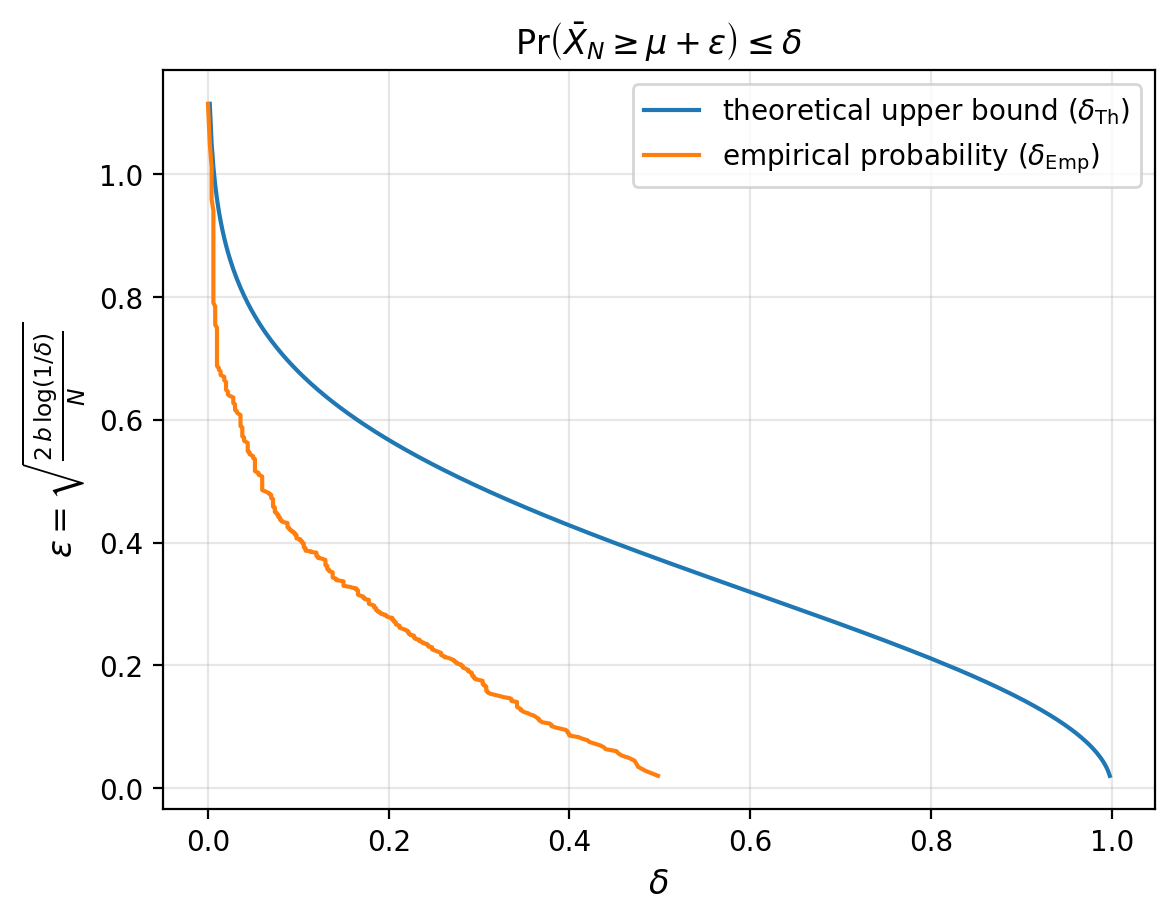

In [64]:
plt.plot(delta_values, bound_values - mu, label="theoretical upper bound ($\delta_\mathrm{Th}$)")
plt.plot(empirical_delta_lbound, bound_values - mu, label="empirical probability ($\delta_\mathrm{Emp}$)")

plt.xlabel("$\delta$", fontsize=12)
plt.ylabel(r"$\epsilon=\sqrt{\frac{2\,b\,\log(1 / \delta)}{N}}$", fontsize=12)
plt.title(r"$\mathrm{Pr}\left(\bar{X}_N \geq \mu + \epsilon\right) \leq \delta$")
plt.legend()
plt.grid(alpha=0.3)

Alternatively, we can write that, with probability at least $1-\delta$,

$$
    \bar{X}_N < \mu + \sqrt{\frac{2\,b\,\log(1/\delta)}{N}}.
$$

That is,
$$
    \mathrm{Pr}\left(\bar{X}_N < \mu + \sqrt{\frac{2\,b\,\log(1 / \delta)}{N}}\right) \geq 1 - \delta.
$$

In words, *with probability at least $1-\delta$, what's the most $\bar{X}_N$ can be positively biased by?*

Empirically, observe the following

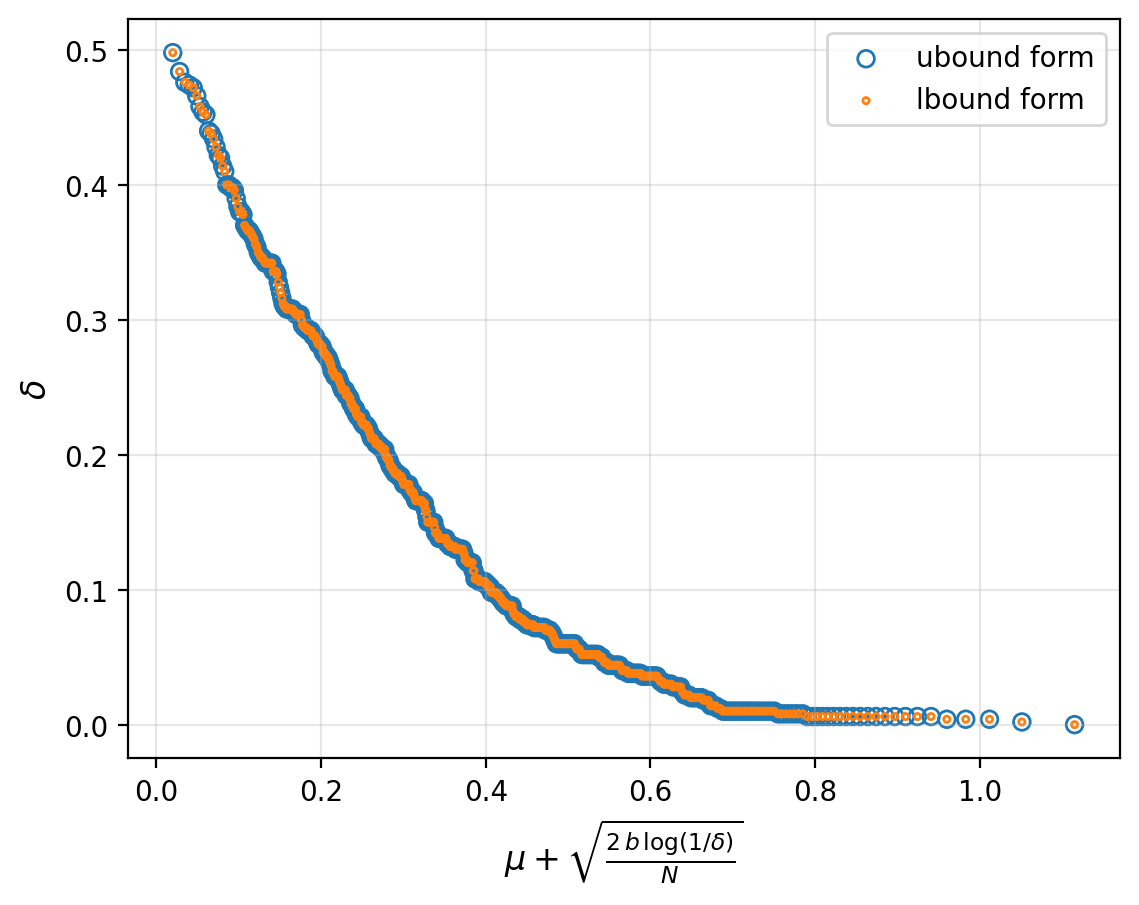

In [50]:
empirical_delta_ubound = (xbar[:, None] < bound_values[None, :]).mean(axis=0)
plt.scatter(bound_values, 1 - empirical_delta_ubound, color="none", edgecolor="tab:blue", label="ubound form")
plt.scatter(bound_values, empirical_delta_lbound, color="none", edgecolor="tab:orange", s=5, label="lbound form")
plt.legend()
plt.ylabel("$\delta$", fontsize=12)
plt.xlabel(r"$\mu + \sqrt{\frac{2\,b\,\log(1 / \delta)}{N}}$", fontsize=12)
plt.grid(alpha=0.3)